# Basic image processing using python - scikit-image
## Introduction
we'll work with the kaggle dataset of 96x96x3(RGB) patches
using patches allows us to focus on the mechanics of image manipulation, without the complexity of large heterogenous WSI
This notebook will focus on the scikit-image package: https://scikit-image.org/docs/stable/user_guide.html
We'll initially work with scikit-image, though opencv and pillow are also frequently used in image processing in python



## Packages used
Numpy: for arrary manipulation 
pandas: for data manipulation, summarization with data frames
matplotlib: the classic plotting library, similar plot building mechanics to r tidyverse
skimage: scikit-image, a sister package to scikit-learn for image manipulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
import os
import glob


## Project setup
Define all the project-relevant variables to use in setup and downstream analysis

begin by loading a single test image from the dataset using explicit filenames with `io.imread` 
Then view the image with `plt.imshow`

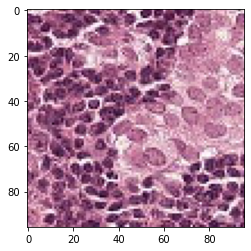

In [2]:
testFilesLoc="/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test"

testimageLoc=os.path.join(testFilesLoc, "00006537328c33e284c973d7b39d340809f7271b.tif")
testimage=io.imread(testimageLoc)
plt.imshow(testimage)

We see a 96x96 H&E image of dense dark nuclei against a region of pale, larger cells


## Load the working dataset
create a list and populate it with image locations
use the list to read in the images to a new list to manipulate
lots of ways to do this, including glob(which behaves like unix) and `walk`(which returns a 2 column list of files and directories and is better for complex directory structures)
the `glob` function from the glob package also allows you to build a list of filenames based on stems and wildcards

The cell below creates a list of file locations using a list comprehension and glob, then confirms those locations by printing a set of them to the console. 


In [3]:
imlocs=[]


imlocs = [f for f in glob.glob(testFilesLoc+"/*.tif")]
imlocs_small=imlocs[0:6]
imlocs_small

['/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/fd0a060ef9c30c9a83f6b4bfb568db74b099154d.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/1f9ee06f06d329eb7902a2e03ab3835dd0484581.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/19709bec800f372d0b1d085da6933dd3ef108846.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/7a34fc34523063f13f0617f7518a0330f6187bd3.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/93be720ca2b95fe2126cf2e1ed752bd759e9b0ed.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/761dde7de22cb39a0dd67ce472163d66e5ac1568.tif']

### define a reduced subset of the full dataset for quick demonstration work
because the full dataset is large, select a smaller chunk to play around with 

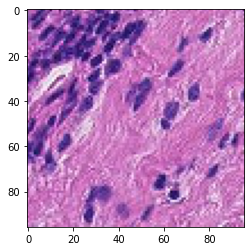

In [4]:
imfiles_small=[]

for imloc in imlocs_small: 
    imfiles_small.append(io.imread(imloc))
    
imfiles_small[1]
plt.imshow(imfiles_small[0])

### Review List manipulation in python 
to work with many images, as would be needed in an ML setting, lists provide a convenient structure to store and interact
both list comprehensions, statements formatted as `[action(subject) for subject in list if condition]`
and the `map(function, target)` functions allow for application of functions to list elements
combining these operations with ad hoc 'lambda functions' affords considerable control over lists and their elements

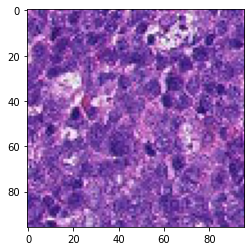

In [5]:
a=list(map(plt.imshow, imfiles_small))

b=[plt.imshow(imfile) for imfile in imfiles_small] 
    



## Images as grids of pixel intensities
Having generated a list of images to play with, lets play
We'll begin with the most basic sorts of image analysis
Lets observe the distribution of intensities for our images by generating simple histograms
this isn't even really an image operation, we're simply summarizing the contents of the np arrays generated by reading in images
NOTE: np.histogram() returns a tuple - the the histogram values and the bin edges
NOTE: both components of np.histogram are necessary to plot the histogram



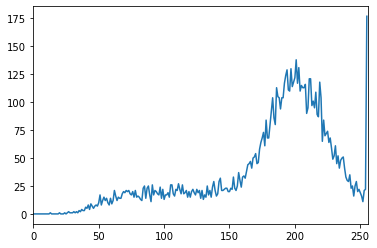

In [6]:

list_histograms=list(map(lambda imfile: np.histogram(imfile[:,:,0], bins = 256, range=(0,1)), imfiles_small))

list_histograms_comp=[np.histogram(imfile[:,:,0], bins=256, range=(0,256)) for imfile in imfiles_small]

a = list_histograms_comp[0]
a1 = a[1]
a0 = a[0]
a1

plt.xlim([0, 256])
plt.plot(a1[0:-1], a0)



### A note on colors
Observe that images read with the default io.imread function reads these RGB formatted full color H&E images as a 3-Dimensional array of pixel intensities
at each cartesian coordinate, the intensity of one color (RGB) is recorded
in a color image, there are three of these two-dimensional pixel intensity arrays. 
8-bit images record pixel intensity in a range from 0-2^(8-1)-1, or 0-255
other image formats may encode image information differently. 
Greyscale images record only one channel of intensities and so are read as a single numpy array
Note that if a color image is read as greyscale, the exact processing applied may vary by package and method employed
If you want to read a color image as greyscale, ideally some kind of explicit `asgreyscale` function should specify that explicity
HSV encoded images record the hue, saturation, and V?? for an image at a location

## Define Functions and characterize images with histograms
function definition in python is simple and facilitates repeat operations on list elements 
a function is named with `def functionName` and its parameters are defined withing the parenthesis
> `def functionName(param, namedParam=default):`
> `    function definition`
> `    return returnValue`

Below several functions were defined that use the matplotlib package to generate histograms to summarize images
The functions below generate histograms by counting the distribution of pixel intensities in a single channel
the `np.histogram` function returns this summary as a tuple of values: the (**values**, and the **bins**)
> **values** simply records the count of intensity values falling within its corresponding **bin**
> **bins** defines the granularity of the histogram, in our case we want one bin for each intensity value, so 256 bins for 0-255

There are also plotting functions defined using the matplotlib library
These functions explicity define some parameters around basic plotting functions

In [7]:
def plotHist(histTuple, color = 0): 
    vals_hist = histTuple[0]
    vals_bins = histTuple[1]
    
    plt.xlim([0, 255])
    plt.title("Grayscale Histogram")
    plt.xlabel("grayscale intensity")
    plt.ylabel("pixels")
    thePlot=plt.plot(a1[0:-1], a0)
    return thePlot

def getHist_color(imfile):
    colorList = ["r", "g", "b"]
    hists_color = [np.histogram(imfile[:,:,ind], bins = 255, range=(0,255)) for ind, color in  enumerate(colorList)]
    return hists_color

def plotHist_color(histTuple, colorVal): 
    vals_hist = histTuple[0]
    vals_bins = histTuple[1]
    
    plt.xlim([0, 255])
    thePlot=plt.plot(vals_bins[0:-1], vals_hist, color=colorVal)
    return thePlot

def viewHist_color(imfile): 
    # tuple to select colors of each channel line
    colors = ("r", "g", "b")
    channel_ids = (0, 1, 2)

    # create the histogram plot, with three lines, one for
    # each color
    plt.xlim([0, 255])
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            imfile[:, :, channel_id], bins=255, range=(0, 255)
        )
        plt.plot(bin_edges[0:-1], histogram, color=c)

    plt.xlabel("Color value")
    plt.ylabel("Pixels")
    plt.title("3 Color Histogram")
    plt.show()

def viewHists_color(imfiles): 
    # Subplots are organized in a Rows x Cols Grid
    # Tot and Cols are known

    Tot = len(imfiles)
    Cols = 3 # generate three column plots for readability

    # Compute Rows required

    Rows = Tot // Cols 
    Rows += Tot % Cols

    # Create a Position index

    Position = range(1,Tot + 1)
    
    # tuple to select colors of each channel line
    colors = ("r", "g", "b")
    channel_ids = (0, 1, 2)
    
    #plt.xlim([0, 255])
    
    fig = plt.figure(1, frameon=False, constrained_layout=False)
    
    # Create a subplot for each image in the image list, adding a set of axes and the plot to the image at the specified position
    
    for index,imfile in enumerate(imfiles):
        ax=fig.add_subplot(Cols,Rows,Position[index], axisbelow=False, frameon=False)
        ax.set_title("Image #"+str(index))
         # create the histogram plot, with three lines, one for
         # each color
        for channel_id, c in zip(channel_ids, colors):
            histogram, bin_edges = np.histogram(
                imfile[:, :, channel_id], bins=255, range=(0, 255)
            )
            plt.plot(bin_edges[0:-1], histogram, color=c)

        #ax.set_xlabel("Color value")
        #ax.set_ylabel("Pixels")
        #ax.title("3 Color Histogram")
    
        #for a in ax: 
        #    a.axis("off")
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=.1)

    #plt.tight_layout
    #plt.subplot_tool()

    plt.show()
    
    #plt.xlabel("Pixel intensity value")
    #plt.ylabel("Count")


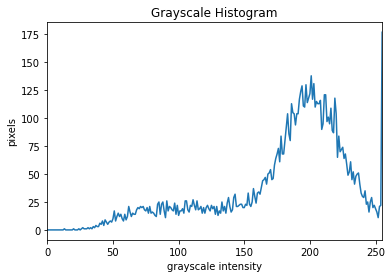

In [8]:
a = list_histograms_comp[0]

plotHist(a)



the above histogram demonstrates a focus of intensity at ~180-220, without other clearly delineated peaks
This histogram makes for challenging analysis, for reasons that will be explored in more detail below, but some improvement is possible

### Color histograms
Combining the histograms for the multiple channels in multi-channel images can give a sense of if any single channel is particularly information rich
Below, a summary of a three channel color image is generated

In [9]:
list_histograms_color = [getHist_color(hist) for hist in imfiles_small]

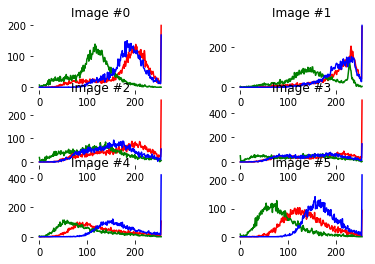

In [10]:

viewHists_color(imfiles_small)

In [11]:
list_colorHist=[getHist_color(imageFile) for imageFile in imfiles_small]

In [12]:
len(list_colorHist)

6

## Image Analysis - Thresholds and Masking
Now that we've illustrated that an image can be manipulated as a grid of pixel intensity values, lets perform simple manipulations of the image based on those properties
By filtering out pixels with intensity values outside of a target range, or outside of a threshold, we can focus on certain aspects of an image
simple boolean filtering of the numpy arrays can generate a boolean array or "mask" that records if a pixel at a corresponding position is has a value within a target range

The function below generates an image with the pixels below a threshold removed. 

In [13]:
## Next create a simple mask based on an intensity threshold
from skimage import img_as_float, img_as_ubyte
def applyThresholdMask(imageFile, threshold): 
    workingIm = img_as_ubyte(imageFile)
    mask = workingIm < threshold
    workingIm[mask] = 0
    return workingIm


def showMultiplot(imfiles, title = "Multiplot"): 
    # Subplots are organized in a Rows x Cols Grid
    # Tot and Cols are known

    Tot = len(imfiles)
    Cols = 2 # generate three column plots for readability

    # Compute Rows required

    Rows = Tot // Cols 
    Rows += Tot % Cols

    # Create a Position index

    Position = range(1,Tot + 1)
    
    # tuple to select colors of each channel line
    colors = ("r", "g", "b")
    channel_ids = (0, 1, 2)
    
    #plt.xlim([0, 255])
    
    fig = plt.figure(1, frameon=False, constrained_layout=True)
    fig.suptitle(title, ha="left", va="bottom")
    
    # Create a subplot for each image in the image list, adding a set of axes and the plot to the image at the specified position
    for index,imfile in enumerate(imfiles):
        ax=fig.add_subplot(Cols,Rows,Position[index], axisbelow=False, frameon=False)
        ax.imshow(imfile)
        ax.axis("off")
    
    
    plt.show()

    

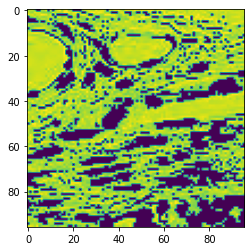

In [14]:
## Using peaks in the image histogram, we can build histogram based intensity threshold masks
#plt.imshow(applyThresholdMask(imfiles_small[1], 50))
plt.imshow(applyThresholdMask(imfiles_small[1], 200))

## This method is very limitted, but the principle is an important one
plt.imshow(applyThresholdMask(imfiles_small[1], 200)[:,:,0])



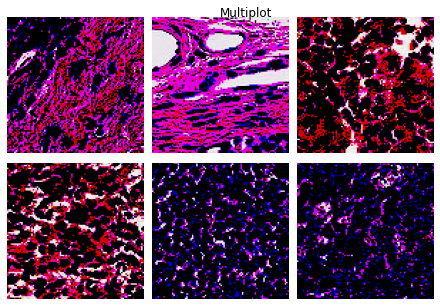

In [15]:
showMultiplot([applyThresholdMask(imfile, 200) for imfile in imfiles_small])

### Fine tuning masks: "opening" and "closing"
This threshold-based mask can be modified with "opening" and "closing" operations
These operations help define features in images by dilating and eroding areas of intensity
We'll try opening first, to better split adjacent nuclei, then closing to smooth

The below function generates a threshold mask, and subsequently tries to clean that mask with opening and closing operations

In [16]:
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import opening, closing
def applyThresholdMask_OpClose(imageFile, threshold): 
    workingIm = img_as_ubyte(imageFile)
    mask = workingIm < threshold
    workingIm[mask] = 0
    workingIm= closing(workingIm)
    #workingIm= opening(workingIm)

    return workingIm

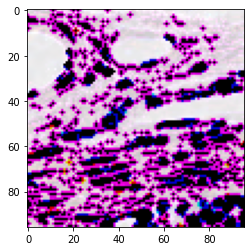

In [17]:
## Using peaks in the image histogram, we can build histogram based intensity threshold masks
plt.imshow(applyThresholdMask_OpClose(imfiles_small[1], 200))

## This method is very limitted, but the principle is an important one
plt.imshow(applyThresholdMask_OpClose((imfiles_small[1]), 200))



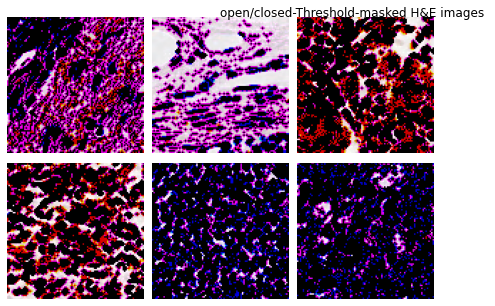

In [18]:
showMultiplot([applyThresholdMask_OpClose(imfile, 200) for imfile in imfiles_small], "open/closed-Threshold-masked H&E images ")

## Otsu thresholding
The "otsu" thresholding method can be used to threshold features that occupy distinct peaks in the histogram
https://en.wikipedia.org/wiki/Otsu's_method

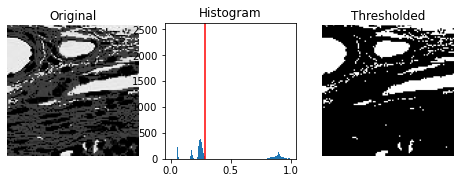

In [19]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

imfiles_small_grey=[rgb2gray(imfile) for imfile in imfiles_small]

image=imfiles_small_grey[1]
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

## De-noising and Edge detection Filters
histogram threshold-based segmentation has limitted utility in analysis of digital pathology images
the method fails when areas are not clearly defined by hard thresholds, as in the heterogenous structure of cells in stroma
applying some de-noising filters can improve the ability to discriminate peaks in noisy histograms, but that still requires clear peaks corresponding to features of interest
segmentation methods the use some kind of edge detection can improve on purely histogram based segmentation

Explore some of the built-in filters from skimage
We'll import edge detection filters, `roberts`, `sobel`, and `scharr`
and some de-noising filters `gaussian`, `median`, `

Note that these filters operate on 2D data, so we'll work with the greyscale versions of our dataset

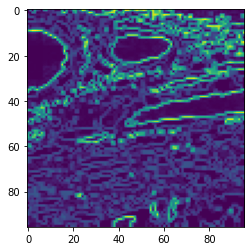

In [20]:
from skimage.filters import roberts, sobel, scharr
from skimage.color import rgb2gray

imfiles_small_grey=[rgb2gray(imfile) for imfile in imfiles_small]
test_roberts = roberts(imfiles_small_grey[1])
plt.imshow(test_roberts)

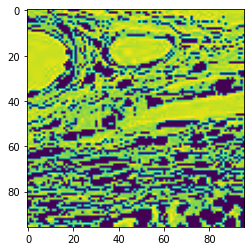

In [35]:
## The "Multi-Otsu" function builds on the otsu method of image threshold detection to allow multiple cutoffs to be uncovered 


plt.imshow(imfiles_small[1][:,:,2])

### Roberts edge detection filter
The above call to roberts() applies the "robert's cross" algorithm to detect edges (https://en.wikipedia.org/wiki/Roberts_cross) 
as implemented https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.roberts

as detailed in the article, the robert's cross method looks for continuity in adjacent pixel intensity using teh geometric distance
this approach is conceptually straightforward, but more sensitive to noise than more complex methods


In [21]:
imfiles_small_roberts=[]
#### The operation can be applied to the collection of images with a list comprehension: 
imfiles_small_roberts=[roberts(image) for image in imfiles_small_grey]

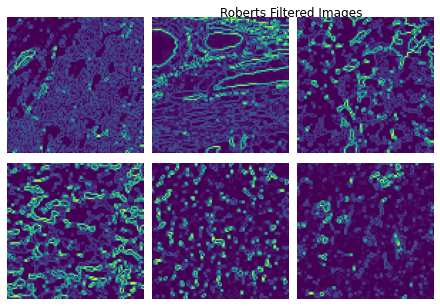

In [22]:
showMultiplot(imfiles_small_roberts, "Roberts Filtered Images")

### Sobel edge detection filter
Next look at filtering and edge detection with the "Sobel Operator" https://en.wikipedia.org/wiki/Sobel_operator
Like the roberts operator, it is based on a gradient of pixel intensity by x,y position
like th roberts operator, it uses relatively simple steps to produce reasonable edge detection results, but is sensitive to high frequency noise



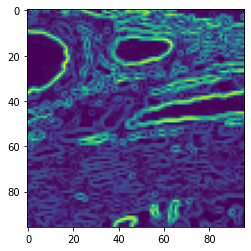

In [23]:
test_sobel = sobel(imfiles_small_grey[1])
plt.imshow(test_sobel)

imfiles_small_sobel=[]
imfiles_small_sobel=[sobel(image) for image in imfiles_small_grey]

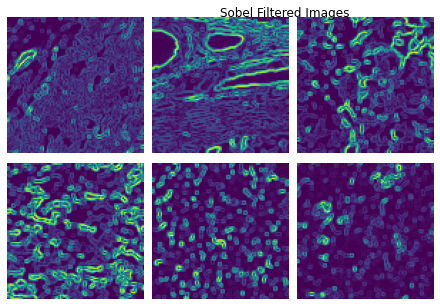

In [24]:
showMultiplot(imfiles_small_sobel, "Sobel Filtered Images")

### Scharr edge detection filter
Next look at filtering and edge detection with the "scharr Operator" https://en.wikipedia.org/wiki/scharr_operator
This filter attempts to minimize the weigthed mean squared angular error in teh fourier domain for pixel intesity



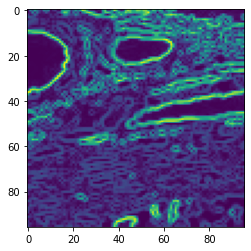

In [25]:
test_scharr = scharr(imfiles_small_grey[1])
plt.imshow(test_scharr)

imfiles_small_scharr=[]
imfiles_small_scharr=[scharr(imfile) for imfile in imfiles_small_grey]



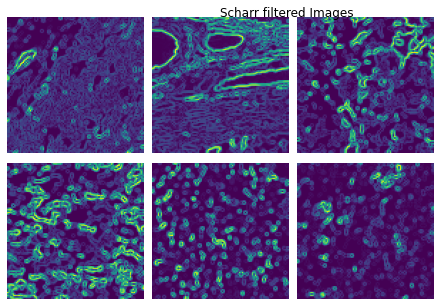

In [26]:
showMultiplot(imfiles_small_scharr, "Scharr filtered Images")

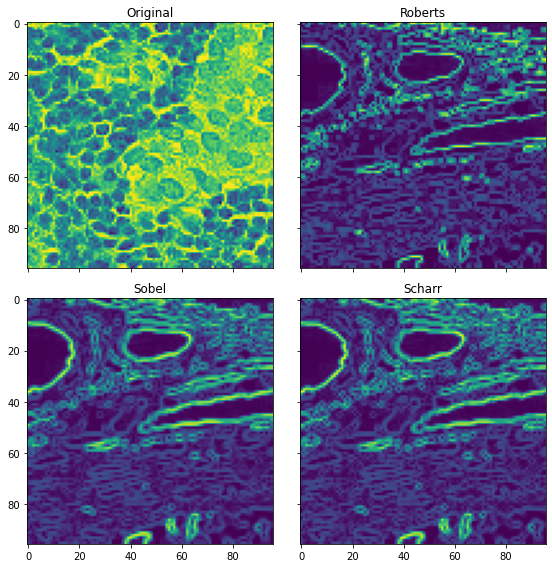

In [27]:
### Lets compare the results of the three filters on a plot with three subplots


fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
ax =axes.ravel()

ax[0].imshow(testimage[:,:,0])
ax[0].set_title("Original")

ax[1].imshow(test_roberts)
ax[1].set_title("Roberts")

ax[2].imshow(test_sobel)
ax[2].set_title("Sobel")

ax[3].imshow(test_scharr)
ax[3].set_title("Scharr")


    
plt.tight_layout()
plt.show()

## Canny Edge detection
Next lets employ "Canny" edge detection, https://en.wikipedia.org/wiki/Canny_edge_detector
"Canny" edge detectino is a multi-step edge detection algorithm developed by John F Canny
Unlike the above filters, this algorithm applies multiple blurring and edge detection filters to yeild a final output

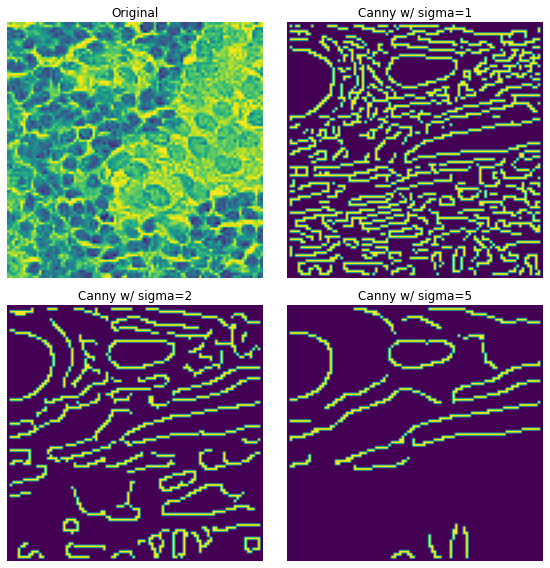

In [28]:

from skimage.feature import canny

test_canny_sig1=canny(imfiles_small_grey[1],sigma = 1)

test_canny_sig2=canny(imfiles_small_grey[1],sigma = 2)

test_canny_sig5=canny(imfiles_small_grey[1],sigma = 3)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
ax =axes.ravel()

ax[0].imshow(testimage[:,:,0])
ax[0].set_title("Original")

ax[1].imshow(test_canny_sig1)
ax[1].set_title("Canny w/ sigma=1")

ax[2].imshow(test_canny_sig2)
ax[2].set_title("Canny w/ sigma=2")

ax[3].imshow(test_canny_sig5)
ax[3].set_title("Canny w/ sigma=5")

for a in ax: 
    a.axis("off")
    
plt.tight_layout()
plt.show()

We see that this edge detection method can't compensate for the poor separation of pixel intensities at the edges of objects
we'll need to improve the preprocessing of the image and use more nuanced approaches to edge detection to have any hope of computationally detecting and defining relevant features on H&E WSI


#### Theory of Canny edge detection: $
Algorithms should have low error rate, to preserve the overall shape of the target
"edge points" returned should accurately reflect the location of the edge
"edge points" should not be duplicated, noise should be unlikely to create false edges

The algorithm achieves these ends through a multi-step approach
A gaussian filter blurs noise initially, to achieve goal 3
a gradient filter is then applied to highlight edges in the blurred image
a threshold is used to filter edges suggested by the blurred image gradient
Bounding double thresholds are applied and edges are defined by connectivity


### Gaussian Blur
canny edge detection uses a gaussian blur to smooth out noisy parts of the image prior to edge detection
A gaussian kernel changes the intensity of a pixel based on the weighted average of the intensities of the pixels around it
The sigma quantity specifies the width of the distribution used to weight nearby pixels for the filter
This application of gaussian blur to reduce noise in an image is an example of its use as a "Low Pass Filter"
A blur like this is ideally suited to reducing noise from a source that produces noise following a gaussian distribution
Lets look at what a few blurring filter

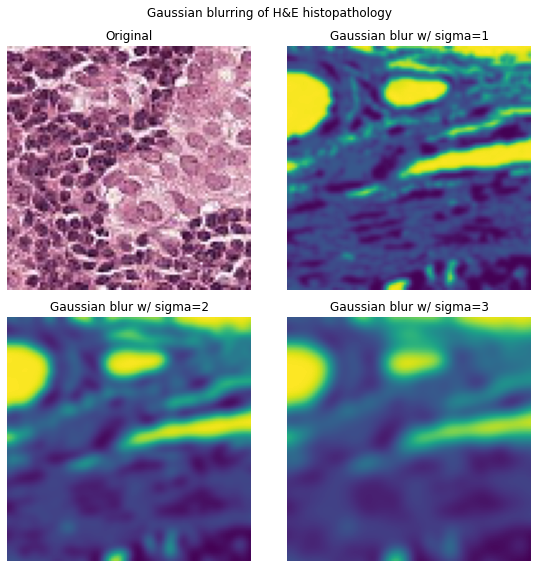

In [29]:
from skimage.filters import gaussian

test_gaussian_sigOne = gaussian(imfiles_small_grey[1], sigma = (1,1), truncate = 4, multichannel = False)
test_gaussian_sigTwo = gaussian(imfiles_small_grey[1], sigma = (2,2), truncate = 4, multichannel = False)
test_gaussian_sigThree = gaussian(imfiles_small_grey[1], sigma = (3,3), truncate = 4, multichannel = False)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
ax =axes.ravel()

ax[0].imshow(testimage)
ax[0].set_title("Original")

ax[1].imshow(test_gaussian_sigOne)
ax[1].set_title("Gaussian blur w/ sigma=1")

ax[2].imshow(test_gaussian_sigTwo)
ax[2].set_title("Gaussian blur w/ sigma=2")

ax[3].imshow(test_gaussian_sigThree)
ax[3].set_title("Gaussian blur w/ sigma=3")

for a in ax: 
    a.axis("off")

fig.suptitle("Gaussian blurring of H&E histopathology")
    
plt.tight_layout()

plt.show()

### Median Blur
While the gaussian filter is useful for noise following a normal distribution, noise is rarely so neat
Non-normally distributed noise requires a nuanced approach, so lets review the basic filters that may contribute to a larger noise reduction algorithm
the "Median" filter is useful for "static" noise
Disc size influences the effect of the median filter

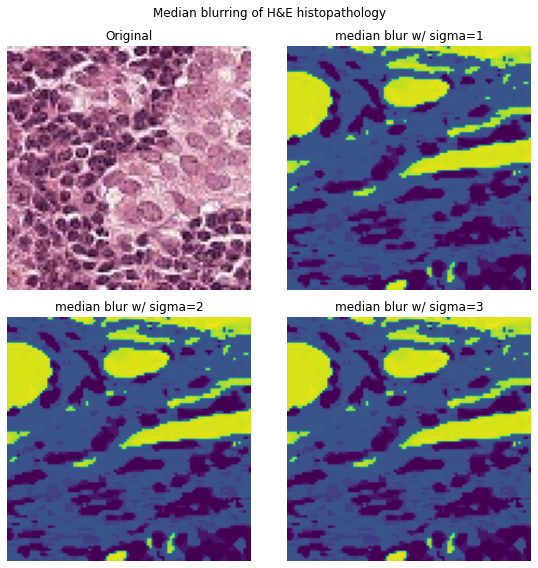

In [30]:
from skimage.filters import median
from skimage.morphology import disk


test_median_sigOne = median(imfiles_small_grey[1])
test_median_sigTwo = median(imfiles_small_grey[1])
test_median_sigThree = median(imfiles_small_grey[1])

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
ax =axes.ravel()

ax[0].imshow(testimage)
ax[0].set_title("Original")

ax[1].imshow(test_median_sigOne)
ax[1].set_title("median blur w/ sigma=1")

ax[2].imshow(test_median_sigTwo)
ax[2].set_title("median blur w/ sigma=2")

ax[3].imshow(test_median_sigThree)
ax[3].set_title("median blur w/ sigma=3")

for a in ax: 
    a.axis("off")

fig.suptitle("Median blurring of H&E histopathology")


    
plt.tight_layout()
plt.show()

### Non-Local Means De-noising
Non-local means de-noising is a more nuanced approach to reducing image noise
https://scikit-image.org/docs/stable/auto_examples/filters/plot_nonlocal_means.html?highlight=non%20local%20means%20denoising
This approach attempts to determine how similar patches of pixels are nearby relative to far away, and then weights the kernel based on that
The estimate_sigma function helps to tune the nlm-denoising, by giving estimates of the base noise 
The h parameter determines how aggressively to smooth by determining the decay rate of patch weigths with distance, ie low - slow decay, lots of influenc, fast - rapid decay, highly local 

also note that non-local means de-noising is being run on the 3 channel image, rather than the greyscale


estimated noise standard deviation = 0.15099366576264403


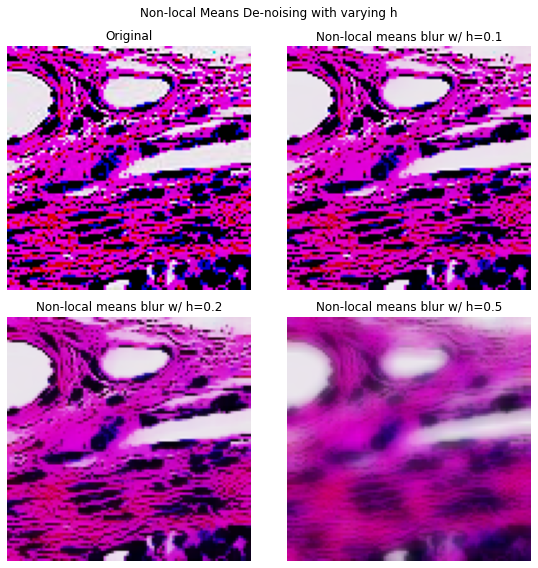

In [31]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise, img_as_float

testimage=img_as_float(imfiles_small[1])

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(testimage, multichannel=True))
print(f"estimated noise standard deviation = {sigma_est}")

patch_kw = dict(patch_size=3,      # 5x5 patches
                patch_distance=4,  # 13x13 search area
                multichannel=True)

# fast algorithm, sigma provided
test_nlmdn_hOne = denoise_nl_means(testimage, h=.1, sigma=sigma_est,
                                 fast_mode=True, **patch_kw)

test_nlmdn_hTwo = denoise_nl_means(testimage, h=.2, sigma=sigma_est,
                                 fast_mode=True, **patch_kw)
test_nlmdn_hThree = denoise_nl_means(testimage, h=.5, sigma=sigma_est,
                                 fast_mode=True, **patch_kw)

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
ax =axes.ravel()

ax[0].imshow(testimage)
ax[0].set_title("Original")

ax[1].imshow(test_nlmdn_hOne)
ax[1].set_title("Non-local means blur w/ h=0.1")

ax[2].imshow(test_nlmdn_hTwo)
ax[2].set_title("Non-local means blur w/ h=0.2")

ax[3].imshow(test_nlmdn_hThree)
ax[3].set_title("Non-local means blur w/ h=0.5")

for a in ax: 
    a.axis("off")
    
plt.suptitle("Non-local Means De-noising with varying h")
plt.tight_layout()
plt.show()



## Object Labeling and Masks
Edge Detection filters can be combined with boolean filters to create object masks
Binary masks can be used for object detection and to investigate "connectedness"

below we attempt to use otsu-thresholded greyscale image masks to create object labelled images

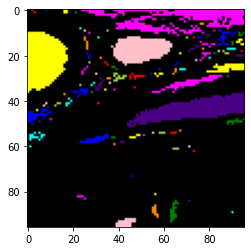

In [32]:
import skimage.measure

testimage=imfiles_small_grey[1]

plt.imshow(applyThresholdMask(skimage.filters.gaussian(testimage), threshold_otsu(testimage)))

# image produced by the unblurred, otsu thresholded 
binMask=testimage > threshold_otsu(testimage)
#plt.imshow(binMask)

# Perform CCA on the mask
labeled_image = skimage.measure.label(binMask, connectivity=2)
plt.imshow(skimage.color.label2rgb(labeled_image, bg_label=0))

The figure above used the binary mask from the thresholded image to identify a collection of distinct, separate regions in the image
the distinct objects identified through connectivity on the binary mask are colored above

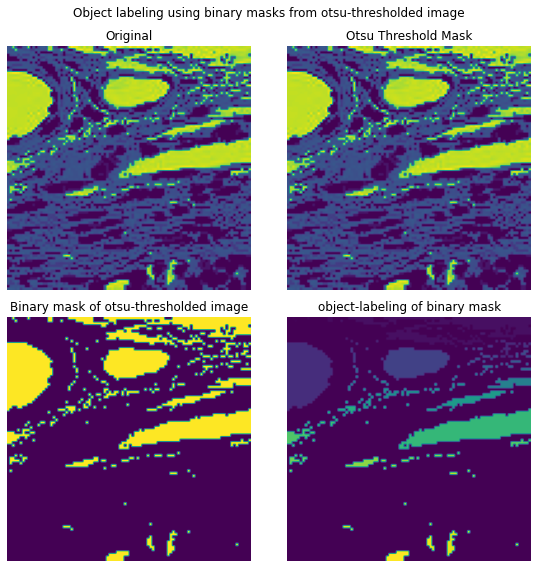

In [33]:


fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,8))
ax =axes.ravel()

ax[0].imshow(testimage)
ax[0].set_title("Original")

ax[1].imshow(applyThresholdMask(testimage, threshold_otsu(testimage)))
ax[1].set_title("Otsu Threshold Mask")

ax[2].imshow(binMask)
ax[2].set_title("Binary mask of otsu-thresholded image")

ax[3].imshow(labeled_image)
ax[3].set_title("object-labeling of binary mask")

for a in ax: 
    a.axis("off")

plt.suptitle("Object labeling using binary masks from otsu-thresholded image")
plt.tight_layout()
plt.show()



### Characterizing labeled objects
With labeled images, we can extract further information about local features of the image
determining the area of labeled regions is accomplished with skimage.measure.regionprops
The function returns a list of RegionProperties, extractable with list comprehensions

We see most regions are very small

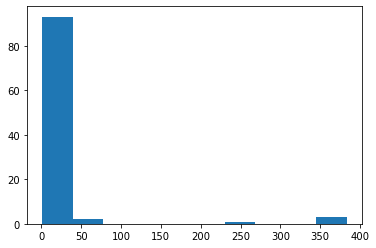

In [34]:
object_features = skimage.measure.regionprops(labeled_image)

object_areas = [objf["area"] for objf in object_features]
plt.hist(object_areas)
plt.show()